Example of a simple reader for compressed LHE files generated by MadGraph
====
Useful links:
* MC particle [numbering scheme](http://pdg.lbl.gov/2020/reviews/rpp2020-rev-monte-carlo-numbering.pdf)
* [TDatabasePDG](https://root.cern.ch/doc/master/classTDatabasePDG.html)
* [TParticlePDG](https://root.cern.ch/doc/master/classTParticlePDG.html)

In [1]:
import ROOT as R
from EzLheReader import EzLheReader

ERROR in cling::CIFactory::createCI(): cannot extract standard library include paths!
Invoking:
  LC_ALL=C x86_64-conda-linux-gnu-c++   -DNDEBUG -xc++ -E -v /dev/null 2>&1 | sed -n -e '/^.include/,${' -e '/^ \/.*++/p' -e '}'
Results was:
With exit code 0


Welcome to JupyROOT 6.24/02


In [2]:
# the reader will scan the header of the lhe file for undefined particles
# if any are found, they will be added to ROOT's TDatabasePDG.Instance()
# Note: only partial information will be added: PID, mass, name
reader=EzLheReader("monopole.lhe.gz")

opening file monopole.lhe.gz
nevents: 1000
xs: 0.005639068 (pb)
Adding new particle mmm with id 4110000 mass= 1000.0 GeV


In [3]:
# Access generator info from reader class
print("Events generated",reader.nevents)
print("Generated cross section",reader.xs,"pb")
print("Effective luminosity for generation",reader.L_eff,"pb")

Events generated 1000
Generated cross section 0.005639068 pb
Effective luminosity for generation 177334.26871248937 pb


In [4]:
# Get info on a particle, here we look at the monpole added by the reader
pdg = R.TDatabasePDG.Instance()
print(pdg.GetParticle(4110000).Mass()) # GetParticle returns a pointer to a TParticlePDG class

1000.0


In [5]:
tc=R.TCanvas()
h_mmm_deta=R.TH1F("h_mmm_deta","monopole delta eta;#Delta#eta;Events",40,0,5)

"row-wise" access, get particles per event
===

In [6]:
first=True
for event,weight in reader.GetEvents():
    P_Zp=R.TLorentzVector()
    for ptcl in event:
        if ptcl.GetPdgCode()==4110000: eta1=ptcl.Eta()
        if ptcl.GetPdgCode()==-4110000: eta2=ptcl.Eta()
        if first: ptcl.Print()
    first=False
    h_mmm_deta.Fill(abs(eta1-eta2))

TParticle: u_bar          p: -0.000000 0.000000 963.399875 Vertex: 0.000000e+00 0.000000e+00 0.000000e+00     0     0
TParticle: u              p: 0.000000 -0.000000 -2984.473596 Vertex: 0.000000e+00 0.000000e+00 0.000000e+00     0     0
TParticle: mmm_bar        p: 763.406714 -1015.259966 -415.015972 Vertex: 0.000000e+00 0.000000e+00 0.000000e+00     1     2
TParticle: mmm            p: -763.406714 1015.259966 -1606.057748 Vertex: 0.000000e+00 0.000000e+00 0.000000e+00     1     2


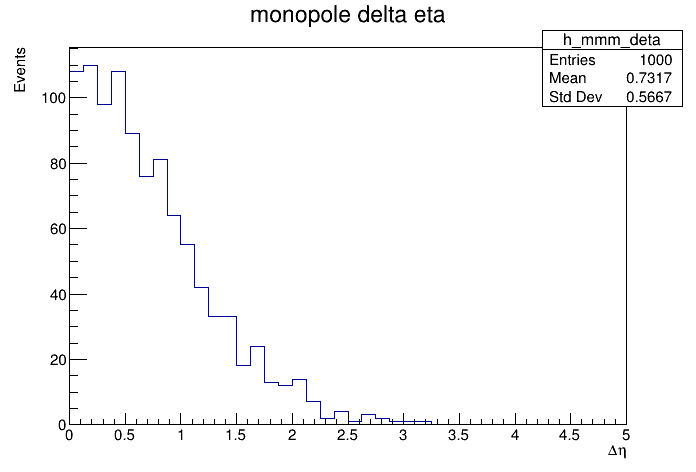

In [7]:
h_mmm_deta.Draw()
tc.Draw()

"column-wise" access, get a list of one particle type across events
====

In [8]:
# GetParticles returns a list of TParticles
mmm=reader.GetParticles(4110000)         # retieve all monopoles
mmm_bar=reader.GetParticles(-4110000)    # retieve all antimonopoles

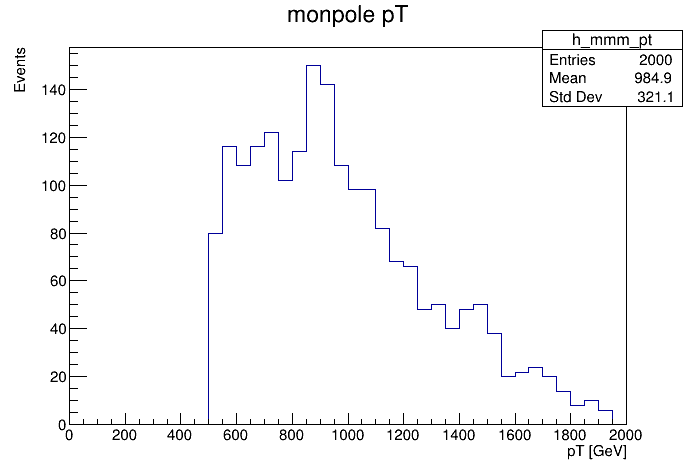

In [9]:
# fill some basic histograms
h_mmm_pt = R.TH1F("h_mmm_pt","monpole pT;pT [GeV];Events",40,0,2000)

for part in mmm:
    h_mmm_pt.Fill(part.Pt())
for part in mmm_bar:
    h_mmm_pt.Fill(part.Pt())

h_mmm_pt.Draw()
tc.Draw()